<a href="https://colab.research.google.com/github/Sumaiya607/Data-Analysis-projects/blob/main/golden_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
df = pd.read_csv('/content/Suicide_bombing_attacks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [4]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

Blast Day Type:

This column indicates the type of day when the bombing occurred, classifying whether it was a regular working day, a weekend, or a public holiday. This information helps in analyzing whether attacks are more frequent on certain days when security may be less stringent or crowds may be larger.

Location Category:

This column specifies the sector or department associated with the location of the bomb blast, such as public spaces (e.g., markets, schools), government facilities, religious institutions, or military areas. It helps in understanding which sectors are being targeted more frequently and why.

Holiday Type:

This column provides details about the nature of the holiday on which the bombing occurred, distinguishing between different types of holidays such as religious holidays, national holidays, or regular weekends. This can help identify patterns in attacks on significant dates.

Location Sensitivity:

This column represents the security sensitivity of the bomb blast location, classifying whether it was a highly sensitive location (e.g., government or military facilities), a medium-sensitive location (e.g., schools or large public gatherings), or a low-sensitive location (e.g., remote or sparsely populated areas). This helps assess the level of risk and preparedness at different types of locations.

In [6]:
df.describe()

,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,983.000000,696.00000,988.000000,726.000000,824.000000,978.000000,974.000000
mean,32.618279,14.79023,15.253138,31.498623,1.116505,21.093650,69.939612
std,2.475619,17.61733,19.957268,38.656426,0.395625,8.375656,15.081500
min,24.879503,0.00000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,31.823800,3.00000,3.000000,7.000000,1.000000,14.650000,58.282250
50%,33.583300,8.00000,8.000000,20.000000,1.000000,21.295000,70.331000
75%,34.004300,20.25000,18.000000,40.000000,1.000000,28.145000,82.499000
max,35.383300,125.00000,148.000000,320.000000,4.000000,44.000000,111.000000


In [8]:
df.shape

(988, 25)

# **DATA** **CLEANING**

In [9]:
null_value_counts = {
    'Blast Day Type': df['Blast Day Type'].isnull().sum(),
    'City': df['City'].isnull().sum(),
    'Province': df['Province'].isnull().sum(),
    'Location Category': df['Location Category'].isnull().sum(),
    'Location Sensitivity': df['Location Sensitivity'].isnull().sum(),
    'Target Type': df['Target Type'].isnull().sum(),
    'Targeted Sect if any': df['Targeted Sect if any'].isnull().sum(),
    'Killed Min': df['Killed Min'].isnull().sum(),
    'Killed Max': df['Killed Max'].isnull().sum(),
    'Explosive Weight (max)': df['Explosive Weight (max)'].isnull().sum()
}

for column, count in null_value_counts.items():
    print(f"Number of Null Values in '{column}' Column: {count}")


Number of Null Values in 'Blast Day Type' Column: 21
Number of Null Values in 'City' Column: 0
Number of Null Values in 'Province' Column: 0
Number of Null Values in 'Location Category' Column: 0
Number of Null Values in 'Location Sensitivity' Column: 0
Number of Null Values in 'Target Type' Column: 0
Number of Null Values in 'Targeted Sect if any' Column: 794
Number of Null Values in 'Killed Min' Column: 292
Number of Null Values in 'Killed Max' Column: 0
Number of Null Values in 'Explosive Weight (max)' Column: 647


In [10]:
most_repeated_in_Blast_Day_Type = df['Blast Day Type'].mode()

#model will give us index and value of mode(most repeated category)
print("Most Repeated Category is: ", most_repeated_in_Blast_Day_Type[0])

#replacing nan with it
df['Blast Day Type'].fillna(most_repeated_in_Blast_Day_Type, inplace=True)

#Now number of Null values after replacing Null values
print("Number of Null Values in 'Blast Day' Column after Replacement: ", df['Blast Day Type'].isnull().sum())

Most Repeated Category is:  Working Day
Number of Null Values in 'Blast Day' Column after Replacement:  21


In [11]:
df['Blast Day Type'].value_counts()

,count
Blast Day Type,
Working Day,801
Holiday,156
Weekend,10


In [12]:
df['Location Category'].value_counts()

,count
Location Category,
Police,182
Mobile,140
Military,139
Religious,114
Market,80
Unknown,70
Park/Ground,64
Residence,50
Government,38


In [13]:
df['Location Category'].fillna('Unknown', inplace=True)

In [14]:
df['Location Category'].isna().sum()

0

In [15]:
#Categories and Value Count of each category in the column
df['Location Sensitivity'].value_counts()

,count
Location Sensitivity,
High,600
Low,239
Medium,149


In [16]:
df['Target Type'].isna().sum()

0

In [17]:
df['Target Type'].value_counts()

,count
Target Type,
Military,246
Police,240
Civilian,166
Government Official,88
Religious,72
Anti-Militants,52
Foreigner,28
civilian,24
Government official,16


In [18]:
# Find the top 3 most repeated categories
top_categories = df['Target Type'].value_counts().head(3).index.tolist()

In [19]:
top_categories

['Military', 'Police', 'Civilian']

In [20]:
# Function to fill NaN with a random choice from the top 3 categories
def fill_nan_with_random_category(Target_Type):
    #if we face null value in Target_Type Col
    if pd.isna(Target_Type):
        #replace it randomly with any entery from top_categories
        return np.random.choice(top_categories)
    else:
        return Target_Type

In [21]:
# Apply the function to fill NaN values
df['Target Type'] = df['Target Type'].apply(fill_nan_with_random_category)

In [22]:
df['Target Type'].value_counts()

,count
Target Type,
Military,246
Police,240
Civilian,166
Government Official,88
Religious,72
Anti-Militants,52
Foreigner,28
civilian,24
Government official,16


In [23]:
#checking null values now.
df['Target Type'].isna().sum()

0

In [24]:
df['Killed Max'].isna().sum()

0

In [26]:
#lets check mean of this column
mean_killed_max = df['Killed Max'].mean()
print("Mean: ", mean_killed_max)

Mean:  15.253138075313808


In [27]:
df['Killed Max'].fillna(mean_killed_max, inplace=True)

In [28]:
#null values after filling
df['Killed Max'].isna().sum()

0

In [29]:
df.to_csv('Cleaned_Data_bombing_attack')

In [30]:
df.columns

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

**VISUALIZATION** **AND** **ANALYSIS**

# **On one what day type most of Attacks Happend?**

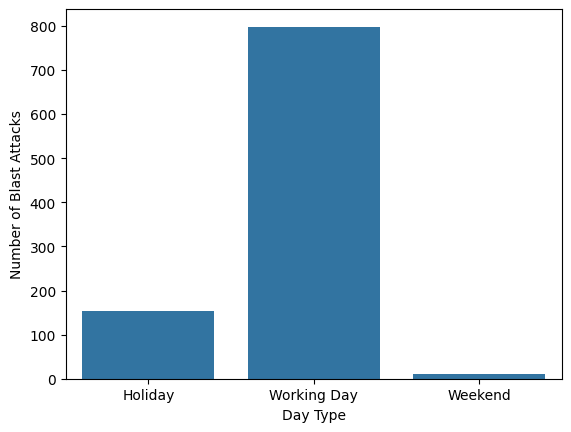

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each Blast Day Type
sns.countplot(data=df, x='Blast Day Type')

# Adding labels
plt.xlabel('Day Type')
plt.ylabel('Number of Blast Attacks')



# Show the plot
plt.show()


The bar graph you plotted visualizes the number of suicide bombing attacks that occurred on different types of days.

It shows that a significantly higher number of attacks happened on working days compared to weekends or holidays. This could indicate that attackers might target working days due to higher population density or lower security presence in certain areas.

# **Which Province was Attacked most number of Times?**

In [32]:
df['Province'].value_counts()

,count
Province,
KPK,501
FATA,140
Punjab,128
Sindh,70
Baluchistan,62
Capital,40
Balochistan,29
AJK,12
Fata,6


In [33]:
#making Fata as FATA
df['Province'].replace({'Fata':'FATA'}, inplace=True)
#making Baluchistan as Balochistan
df['Province'].replace({'Baluchistan':'Balochistan'}, inplace=True)

In [34]:
df['Province'].value_counts()

,count
Province,
KPK,501
FATA,146
Punjab,128
Balochistan,91
Sindh,70
Capital,40
AJK,12


In [35]:
import warnings
warnings.filterwarnings('ignore')


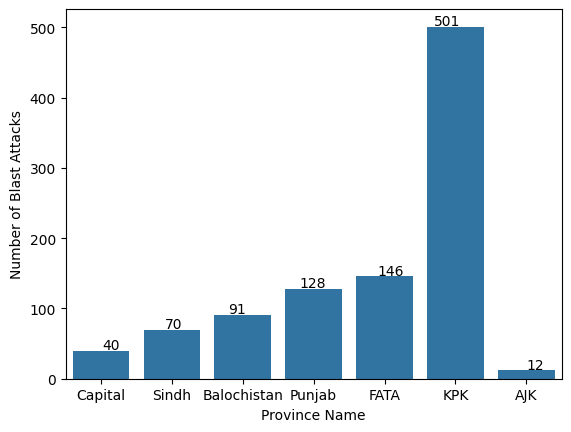

In [36]:
#We will use Count Plot to count occurance of each category that will give us count of Attacks in each Day Type
sns.countplot(data= df, x= df['Province']);
plt.xlabel('Province Name')
plt.ylabel('Number of Blast Attacks')
#writing the Number on the Bars
#for Highest Number-->KPK
plt.text(x = 4.7, y = df['Province'].value_counts()[0]+2, s = df['Province'].value_counts()[0])

#second-->Fata
plt.text(x = 3.9, y = df['Province'].value_counts()[1]+2, s = df['Province'].value_counts()[1])

#third-->Punjab
plt.text(x = 2.8, y = df['Province'].value_counts()[2]+2, s = df['Province'].value_counts()[2])

#Fourth-->Balochistan
plt.text(x = 1.8, y = df['Province'].value_counts()[3]+2, s = df['Province'].value_counts()[3])

#Fifth-->Sindh
plt.text(x = 0.9, y = df['Province'].value_counts()[4]+2, s = df['Province'].value_counts()[4])

#Sixth-->Capital
plt.text(x = 0.02, y = df['Province'].value_counts()[5]+2, s = df['Province'].value_counts()[5])


#AJK
plt.text(x = 6, y = df['Province'].value_counts()[6]+2, s = df['Province'].value_counts()[6])

plt.show()

# **Top 10 Cities Where Most Number of Attacks Happened?**

In [37]:
top_10_most_attacked_cities = df['City'].value_counts().head(10)
# Convert the result to a DataFrame
top_10_most_attacked_cities = pd.DataFrame({'City': top_10_most_attacked_cities.index, 'Count': top_10_most_attacked_cities.values})

In [38]:
top_10_most_attacked_cities

,City,Count
0,Peshawar,143
1,Quetta,67
2,Swat,50
3,Bannu,44
4,Karachi,42
5,Rawalpindi,38
6,Islamabad,34
7,Hangu,34
8,Khyber Agency,28
9,Lahore,28


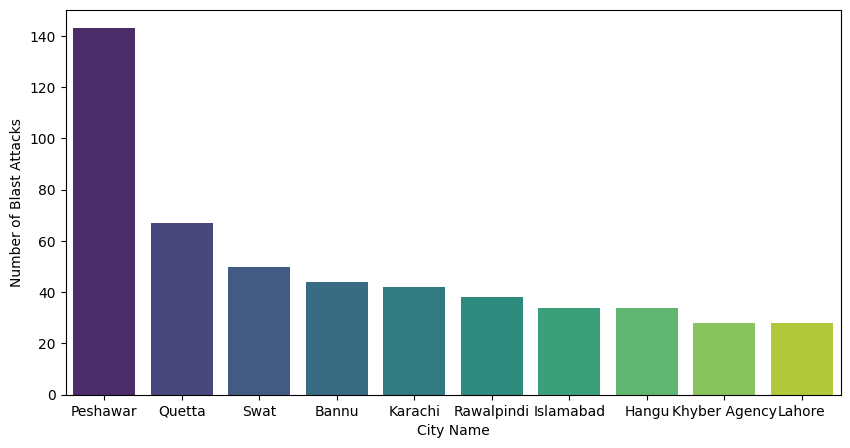

In [91]:
#We will use Count Plot to count occurance of each category that will give us count of Attacks in each Day Type
plt.figure(figsize=(10,5))
sns.barplot(data= df,
            x= top_10_most_attacked_cities['City'],
            y= top_10_most_attacked_cities['Count'],
            palette='viridis');
plt.xlabel('City Name')
plt.ylabel('Number of Blast Attacks')
plt.show()

# **Most Targeted Location Types?**

In [40]:
most_targeted_locations = df['Location Category'].value_counts().head(5)
# Convert the result to a DataFrame
most_targeted_locations = pd.DataFrame({'Location Type': most_targeted_locations.index, 'Count': most_targeted_locations.values})

In [41]:
most_targeted_locations

,Location Type,Count
0,Police,182
1,Mobile,140
2,Military,139
3,Religious,114
4,Market,80


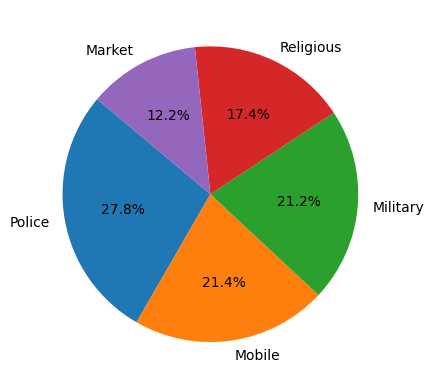

In [42]:
plt.pie(most_targeted_locations['Count'], labels=most_targeted_locations['Location Type'], autopct='%1.1f%%', startangle=140)
plt.show()

# **Number of Time High, Medium and Low Location where Targeted and in which Province those Location where targeted?**

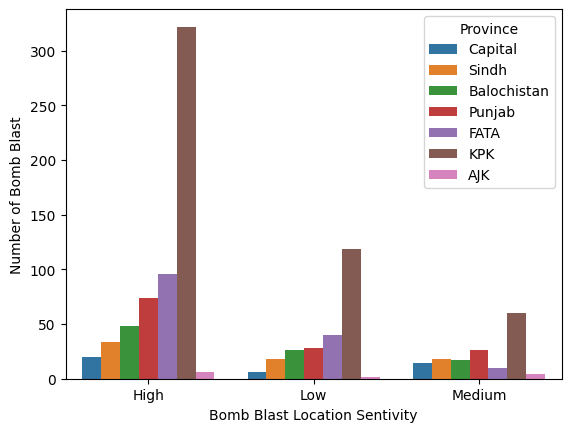

In [43]:
sns.countplot(x= 'Location Sensitivity',
              data= df,
              hue= 'Province')
plt.xlabel('Bomb Blast Location Sentivity')
plt.ylabel('Number of Bomb Blast')

plt.show()

In [44]:
df['Location Sensitivity'].value_counts()

,count
Location Sensitivity,
High,600
Low,239
Medium,149


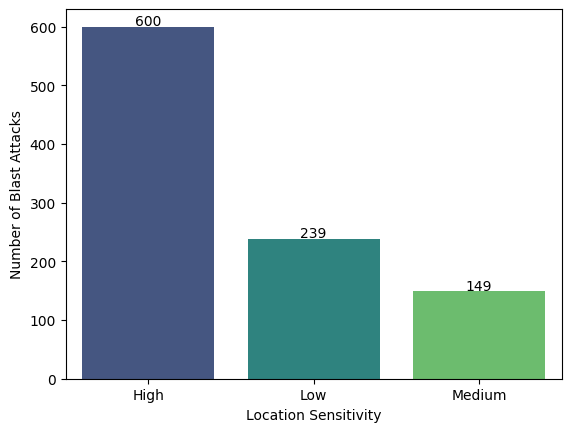

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of each Location Sensitivity
sns.countplot(data=df, x='Location Sensitivity', palette='viridis')

# Adding labels
plt.xlabel('Location Sensitivity')
plt.ylabel('Number of Blast Attacks')

# Writing the numbers on the bars dynamically
for index, value in enumerate(df['Location Sensitivity'].value_counts().values):
    plt.text(x=index, y=value + 2, s=str(value), ha='center')

# Show the plot
plt.show()


# **Most Targetted Part of Society in Pakistan?**

In [46]:
most_targetted_parts = df['Target Type'].value_counts().head(5)
most_targetted_parts = pd.DataFrame({'Target Type': most_targetted_parts.index, 'Count': most_targetted_parts.values})

In [47]:
most_targetted_parts

,Target Type,Count
0,Military,246
1,Police,240
2,Civilian,166
3,Government Official,88
4,Religious,72


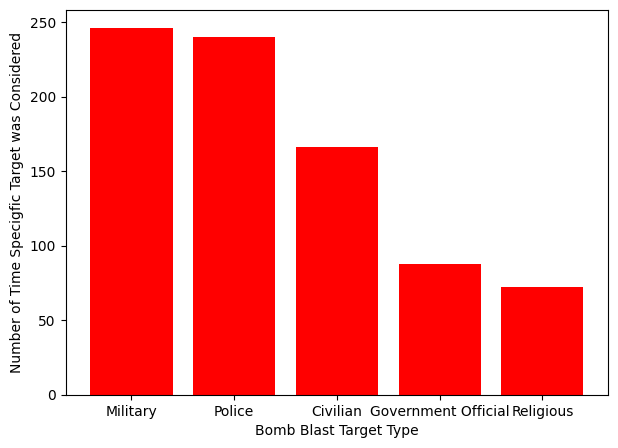

In [93]:
plt.figure(figsize=(7,5))
plt.bar(most_targetted_parts['Target Type'],
           most_targetted_parts['Count'],
           color = 'r')
plt.xlabel('Bomb Blast Target Type')
plt.ylabel('Number of Time Specigfic Target was Considered')

plt.show()

In [50]:
print(df[df['Location'] == 'Army Public School'])
df.drop_duplicates(inplace=True)

                         Date Islamic Date Blast Day Type Holiday Type Time  \
434  Tuesday-December 16-2014          NaN            NaN          NaN  NaN   
930  Tuesday-December 16-2014          NaN            NaN          NaN  NaN   

         City  Latitude Longitude Province            Location  ...  \
434  Peshawar   34.0043   71.5448      KPK  Army Public School  ...   
930  Peshawar   34.0043   71.5448      KPK  Army Public School  ...   

    Targeted Sect if any Killed Min Killed Max Injured Min Injured Max  \
434                  NaN        NaN      148.0         NaN         132   
930                  NaN        NaN      148.0         NaN         132   

    No. of Suicide Blasts  Explosive Weight (max)  Hospital Names  \
434                   NaN                     NaN             NaN   
930                   NaN                     NaN             NaN   

     Temperature(C) Temperature(F)  
434            9.86         49.748  
930            9.86         49.748  

[2 ro

# **Top 3 Bomb Blast in which most people were Killed?**

In [51]:
df.drop_duplicates(subset=['City', 'Location', 'Killed Max'], inplace=True)

In [52]:
#lets sort the dataframe by Killed max column to get top 3 firstly
df_sorted_killedmax = df.sort_values(by= 'Killed Max', ascending=False).head(3)

In [53]:
df_sorted_killedmax[['Killed Max', 'City', 'Location']]

,Killed Max,City,Location
434,148.0,Peshawar,Army Public School
68,145.0,karachi,Benazir Survives midnight \ncarnage Karsaz bri...
113,100.0,Rawalpindi,Wah Cant Pakistn Ordinance Factories


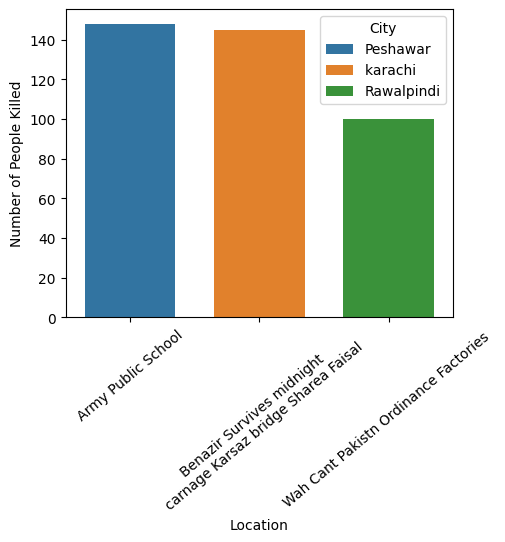

In [99]:
plt.figure(figsize=(5,4))
sns.barplot(data=df_sorted_killedmax,
            x='Location',
            y='Killed Max',
            hue='City',
            width=0.7)

plt.xlabel('Location')
plt.ylabel('Number of People Killed')

# Tilt the x-axis labels by 40 degrees
plt.xticks(rotation=40)

plt.show()



In [55]:
number_of_people_killed_in_every_city = df.groupby('City', as_index=False)['Killed Max'].sum()

In [56]:
#now lets sort that dataset to get cities where most number of people were killed in total attacks
number_of_people_killed_in_every_city.sort_values(by= 'Killed Max',
                                                  inplace=True,
                                                 ascending=False)

In [57]:
top_4 = number_of_people_killed_in_every_city.head(4)
top_4

,City,Killed Max
61,Quetta,886.253138
57,Peshawar,881.506276
63,Rawalpindi,381.000000
38,Lahore,336.000000


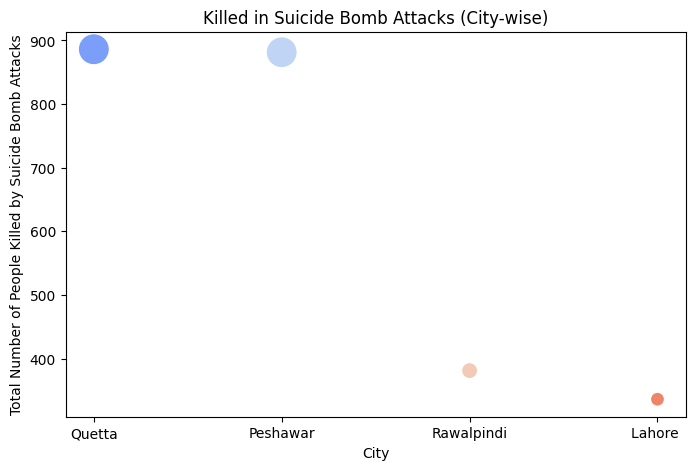

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with bubble sizes representing 'Killed Max'
plt.figure(figsize=(8,5))
sns.scatterplot(data=top_4,
                x='City',
                y='Killed Max',
                size='Killed Max',
                hue='City',
                sizes=(100, 500),
                palette="coolwarm", legend=False)

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Total Number of People Killed by Suicide Bomb Attacks')
plt.title('Killed in Suicide Bomb Attacks (City-wise)')

plt.show()


# **How many Bomb Blast Happened Every year?**

In [59]:
#creating Year Column
df['Year'] = df['Date'].str.split('-').str[-1]

In [60]:
Total_Blast_in_every_year = df['Year'].value_counts()
Total_Blast_in_every_year = pd.DataFrame({'Year': Total_Blast_in_every_year.index, 'Count': Total_Blast_in_every_year.values})

In [61]:
Total_Blast_in_every_year.head(4)

,Year,Count
0,2009,90
1,2008,61
2,2010,57
3,2007,56


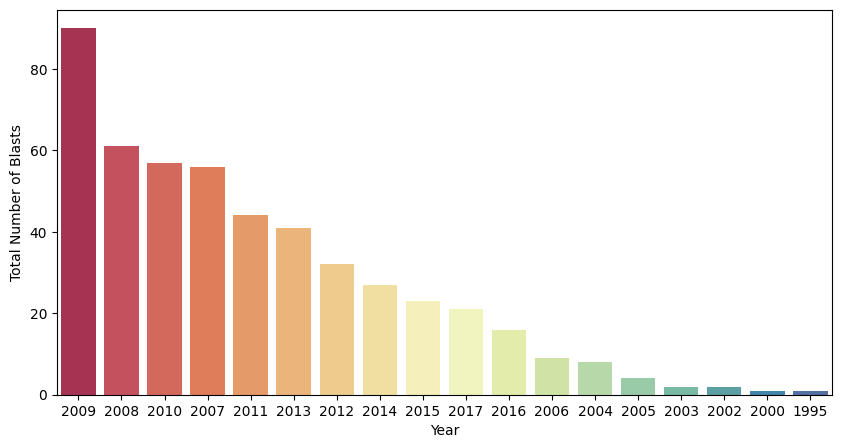

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(data = Total_Blast_in_every_year,
           x= 'Year',
           y= 'Count'
           , palette='Spectral')
plt.xlabel('Year')
plt.ylabel('Total Number of Blasts')
plt.show()

# **How Number of Blast Vary with every Year?**

In [63]:
sorted_Year = Total_Blast_in_every_year.sort_values(by= 'Year')

In [64]:
sorted_Year

,Year,Count
17,1995,1
16,2000,1
15,2002,2
14,2003,2
12,2004,8
13,2005,4
11,2006,9
3,2007,56
1,2008,61
0,2009,90


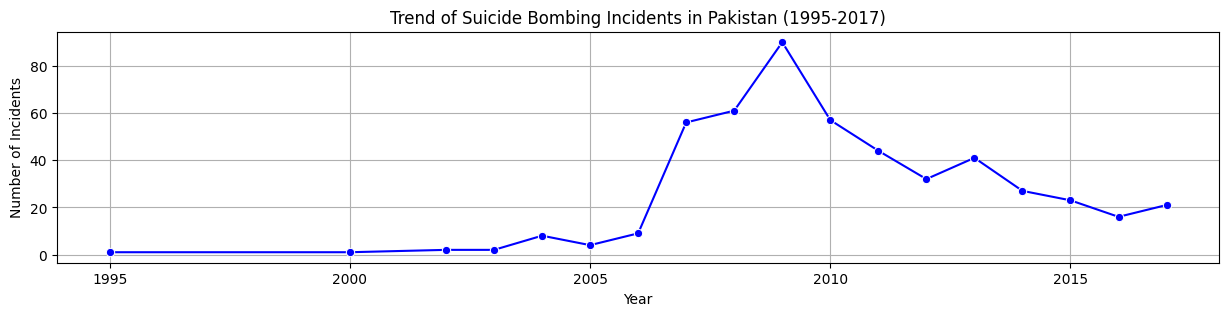

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Year': [1995, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Count': [1, 1, 2, 2, 8, 4, 9, 56, 61, 90, 57, 44, 32, 41, 27, 23, 16, 21]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(15, 3))
sns.lineplot(data=df, x='Year', y='Count', marker='o', color='b')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Trend of Suicide Bombing Incidents in Pakistan (1995-2017)')
plt.grid(True)

# Display
plt.show()


# **What is the impact of suicide bombing attacks in terms of casualties?**

In [66]:
avg_count = df['Count'].mean()

#print(f'Average number of people killed: {avg_killed:.2f}')
#print(f'Average number of people injured: {avg_injured:.2f}')

print(f'Average count: {avg_count:.2f}')

Average count: 27.50


# **What is the average number of people killed and injured in these attacks?**

In [67]:
df= pd.read_csv('/content/Cleaned_Data_bombing_attack')
# Convert 'Injured Max' column to numeric type
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# Calculate the average number of people killed and injured
avg_killed = df['Killed Max'].mean()
avg_injured = df['Injured Max'].mean()

print(f'Average number of people killed: {avg_killed:.2f}')
print(f'Average number of people injured: {avg_injured:.2f}')

Average number of people killed: 15.25
Average number of people injured: 39.57


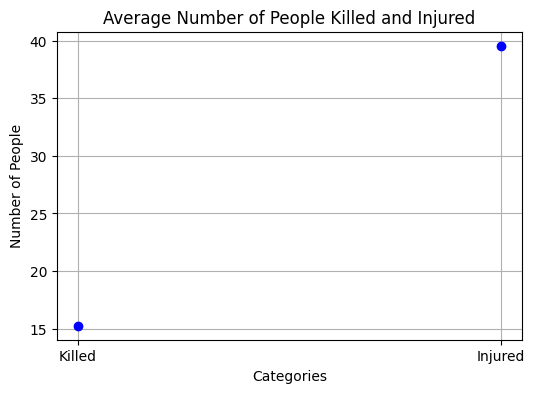

In [101]:
plt.figure(figsize=(6,4))

# Data for visualization
# Define categories and values
categories = ['Killed', 'Injured']
values = [avg_killed, avg_injured] # Assuming you want to use the calculated averages from previous cells

plt.plot(categories, values, 'o', color='blue')

# Add titles and labels
plt.title('Average Number of People Killed and Injured')
plt.xlabel('Categories')
plt.ylabel('Number of People')
plt.grid(True)

# Show the plot
plt.show()

In [68]:
import pandas as pd
import numpy as np

# assume 'df' is your DataFrame

# calculate z-scores for Killed Max and Injured Max
df['Killed Max_zscore'] = (df['Killed Max'] - df['Killed Max'].mean()) / df['Killed Max'].std()
df['Injured Max_zscore'] = (df['Injured Max'] - df['Injured Max'].mean()) / df['Injured Max'].std()

# identify outliers (z-score > 2 or < -2)
outliers = df[(np.abs(df['Killed Max_zscore']) > 2) | (np.abs(df['Injured Max_zscore']) > 2)]

# remove outliers from the original DataFrame
df_clean = df[~df.index.isin(outliers.index)]

In [69]:
# Standardize the 'Open/Closed Space' column to ensure consistency
df['Open/Closed Space'] = df['Open/Closed Space'].str.lower().str.strip()

# Now, re-run the groupby operation to get the correct results
open_closed_casualties = df.groupby('Open/Closed Space')[['Killed Max', 'Injured Max']].mean()
print(open_closed_casualties)


                   Killed Max  Injured Max
Open/Closed Space                         
closed              18.811122    52.567797
open                13.736509    34.996815
open/closed         22.000000          NaN


In [70]:
# Check how many rows have the value 'open/closed'
df[df['Open/Closed Space'] == 'open/closed']


,Unnamed: 0,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F),Killed Max_zscore,Injured Max_zscore
491,491,Thursday-October-05-2017,13 MuHarram 1439 A.H,Working Day,NaN,NaN,Quetta,28.571051,67.496895,Balochistan,...,22.0,25.0,NaN,1.0,NaN,"Larkana Hospital, Gandawah District Headquarte...",27.8,81.0,0.338065,NaN
987,987,Thursday-October-05-2017,NaN,NaN,NaN,NaN,Quetta,28.571051,67.496895,Balochistan,...,22.0,25.0,NaN,1.0,NaN,"Larkana Hospital, Gandawah District Headquarte...",27.8,81.0,0.338065,NaN


In [71]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Unnamed: 0, Date, Islamic Date, Blast Day Type, Holiday Type, Time, City, Latitude, Longitude, Province, Location, Location Category, Location Sensitivity, Open/Closed Space, Influencing Event/Event, Target Type, Targeted Sect if any, Killed Min, Killed Max, Injured Min, Injured Max, No. of Suicide Blasts, Explosive Weight (max), Hospital Names, Temperature(C), Temperature(F), Killed Max_zscore, Injured Max_zscore]
Index: []

[0 rows x 28 columns]


In [72]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [73]:
# Verify that duplicates are removed
print(df[df.duplicated()])


Empty DataFrame
Columns: [Unnamed: 0, Date, Islamic Date, Blast Day Type, Holiday Type, Time, City, Latitude, Longitude, Province, Location, Location Category, Location Sensitivity, Open/Closed Space, Influencing Event/Event, Target Type, Targeted Sect if any, Killed Min, Killed Max, Injured Min, Injured Max, No. of Suicide Blasts, Explosive Weight (max), Hospital Names, Temperature(C), Temperature(F), Killed Max_zscore, Injured Max_zscore]
Index: []

[0 rows x 28 columns]


In [74]:
# Group by 'Open/Closed Space' and calculate the mean casualties
open_closed_casualties = df.groupby('Open/Closed Space')[['Killed Max', 'Injured Max']].mean()

# Group by 'Location Sensitivity' and calculate the mean casualties
location_sensitivity_casualties = df.groupby('Location Sensitivity')[['Killed Max', 'Injured Max']].mean()

print(open_closed_casualties)
print(location_sensitivity_casualties)


                   Killed Max  Injured Max
Open/Closed Space                         
closed              18.811122    52.567797
open                13.736509    34.996815
open/closed         22.000000          NaN
                      Killed Max  Injured Max
Location Sensitivity                         
High                   13.746792    34.517857
Low                    14.870398    37.107981
Medium                 21.932886    62.675862


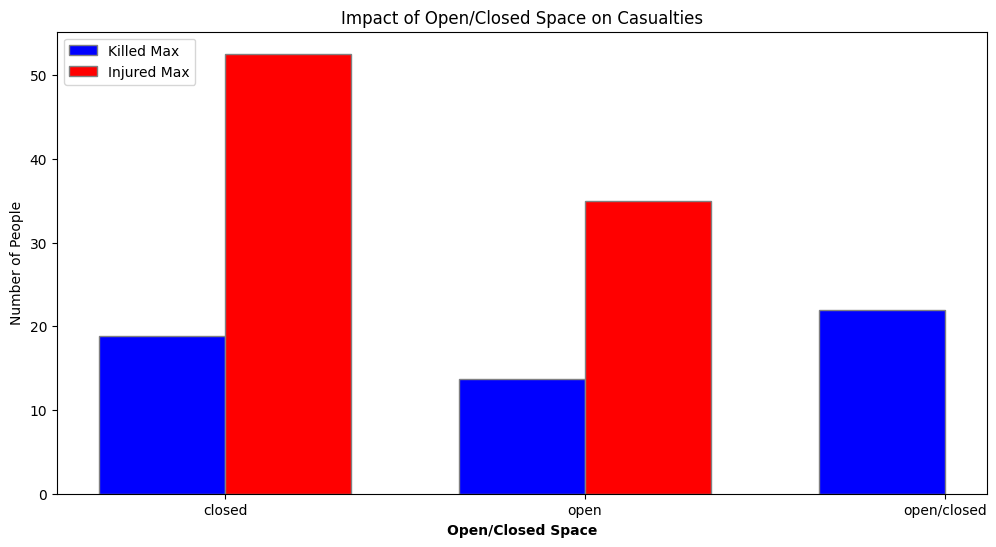

In [75]:
import numpy as np

# Set the figure size
plt.figure(figsize=(12, 6))

# Data for Open/Closed Space
categories = ['closed', 'open', 'open/closed']
killed_max = [18.811122, 13.736509, 22.000000]
injured_max = [52.567797, 34.996815, np.nan]

# Bar width
bar_width = 0.35

# Position of bars
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Bar plot
plt.bar(r1, killed_max, color='b', width=bar_width, edgecolor='grey', label='Killed Max')
plt.bar(r2, injured_max, color='r', width=bar_width, edgecolor='grey', label='Injured Max')

# Add labels
plt.xlabel('Open/Closed Space', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.ylabel('Number of People')

# Title and legend
plt.title('Impact of Open/Closed Space on Casualties')
plt.legend()

plt.show()


Findings & Insights:
1. Impact of Location Type (Open/Closed Space) on Casualties:
Closed spaces have a higher average casualty count, with:
Killed Max: 18.81
Injured Max: 52.57
Open spaces have a lower casualty count on average, with:
Killed Max: 13.73
Injured Max: 34.99
Mixed Open/Closed spaces (spaces that aren't strictly open or closed, such as semi-open locations):
Killed Max: 22.00
However, no data is available for injuries in these mixed spaces.
Insight:

Attacks in closed spaces (such as buildings or confined areas) tend to result in higher casualties, particularly in terms of injuries, likely because people are trapped in a confined area, making escape more difficult.
While open spaces see lower casualties, they still represent significant harm due to the wide range and spread of the impact.
2. Impact of Location Sensitivity:
High Sensitivity Locations:
Killed Max: 13.75
Injured Max: 34.51
Low Sensitivity Locations:
Killed Max: 14.87
Injured Max: 37.11
Medium Sensitivity Locations:
Killed Max: 21.93
Injured Max: 62.68
Insight:

Medium sensitivity locations show the highest number of casualties. This could indicate that these locations may not have sufficient security measures, making them vulnerable.
High sensitivity locations have a relatively lower casualty count, suggesting that more secure and better-monitored locations might reduce the impact of such attacks.
Suggestions for Policy & Preventive Measures:
1. Enhanced Security in Medium-Sensitivity Locations:
Given that medium-sensitivity locations are associated with the highest casualty rates, authorities should review security protocols for these sites. More attention should be given to strengthening surveillance, emergency response plans, and public awareness programs in these areas.
2. Focus on Vulnerable Closed Spaces:
Since closed spaces experience higher casualties, it is crucial to focus on security measures such as enhanced screening, controlled access points, and evacuation planning in enclosed public spaces (e.g., shopping malls, transport hubs, etc.).
Crowded, enclosed locations should be equipped with more robust early-warning systems and crowd management techniques to mitigate the potential harm of an attack.
3. Increase Safety in Open Public Spaces:
While open spaces see lower casualty counts, they remain vulnerable to large-scale attacks. There should be increased patrolling and crowd monitoring during events held in public parks, squares, and festivals. Authorities can also consider placing temporary barriers or checkpoints to control access to crowded open areas.
4. Strengthen Emergency Response Mechanisms:
Regardless of the location type, effective and rapid emergency response can help reduce casualties. Authorities should invest in first-responder training, evacuation drills, and emergency medical infrastructure in regions that are more prone to such attacks.
5. Public Awareness and Safety Training:
Public safety campaigns and community engagement programs should be designed to educate the public on how to act during a bombing attack (e.g., how to evacuate safely, identifying suspicious activity, etc.). This is especially critical for vulnerable locations like schools, marketplaces, and government buildings.

In [76]:
# Convert 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%A-%b %d-%Y', errors='coerce')

# Check if there are any rows where the conversion failed (resulted in NaT)
invalid_dates = df[df['Date'].isna()]

# Display rows with invalid dates
print(invalid_dates)


     Unnamed: 0 Date                   Islamic Date Blast Day Type  \
0             0  NaT  25 Jumaada al-THaany 1416 A.H        Holiday   
1             1  NaT           10 SHa`baan 1421 A.H    Working Day   
3             3  NaT     3 Raby` al-THaany 1423 A.H    Working Day   
4             4  NaT     4 Jumaada al-awal 1424 A.H    Working Day   
5             5  NaT      2 Thw al-Qi`dah 1424 A.H.        Holiday   
..          ...  ...                            ...            ...   
983         983  NaT            22 Shawaal 1432 A.H    Working Day   
984         984  NaT            22 Shawaal 1432 A.H    Working Day   
985         985  NaT            29 Shawaal 1432 A.H    Working Day   
986         986  NaT                            NaN        Weekend   
987         987  NaT                            NaN            NaN   

                           Holiday Type                   Time        City  \
0                               Weekend                    NaN   Islamabad   
1  

In [77]:
import pandas as pd

# Example: Creating a new column marking significant events
significant_events = [
    {'Event': 'General Election', 'Date': '2008-02-18'},
    {'Event': 'War on Terror Surge', 'Date': '2007-07-15'},
    {'Event': 'Eid', 'Date': '2009-09-20'}
]

# Convert event dates to datetime and add them to the dataframe
events_df = pd.DataFrame(significant_events)
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Convert 'Date' column in df to datetime
df['Date'] = pd.to_datetime(df['Date']) #This line converts the 'Date' column in df to datetime

# Merge with the main data based on the date to mark significant events
df = pd.merge(df, events_df, on='Date', how='left')
df['Event'].fillna('No Event', inplace=True)

In [74]:
# Create a new column for year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Count the number of attacks per year
attacks_per_year = df.groupby('Year').size()

# Count the number of attacks per month (for finer-grained analysis)
attacks_per_month = df.groupby(['Year', 'Month']).size().reset_index(name='Attack Count')


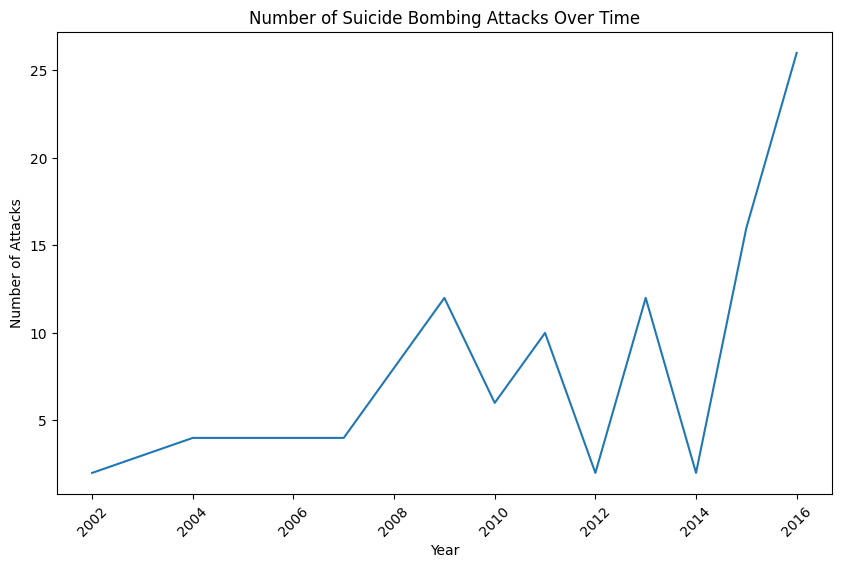

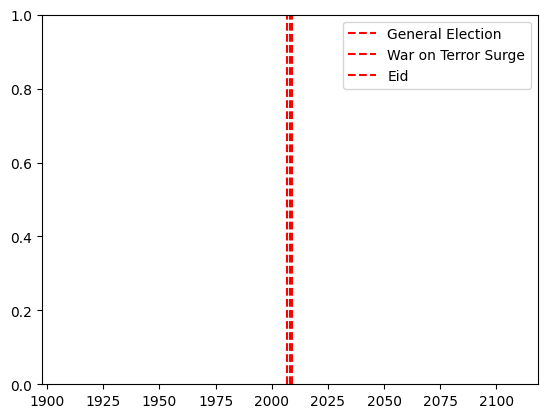

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot attacks per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Number of Suicide Bombing Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# Overlay socio-political events on the graph
for index, row in events_df.iterrows():
    plt.axvline(x=row['Date'].year, color='r', linestyle='--', label=row['Event'])

plt.legend()


1. Correlation between temperature and number of attacks

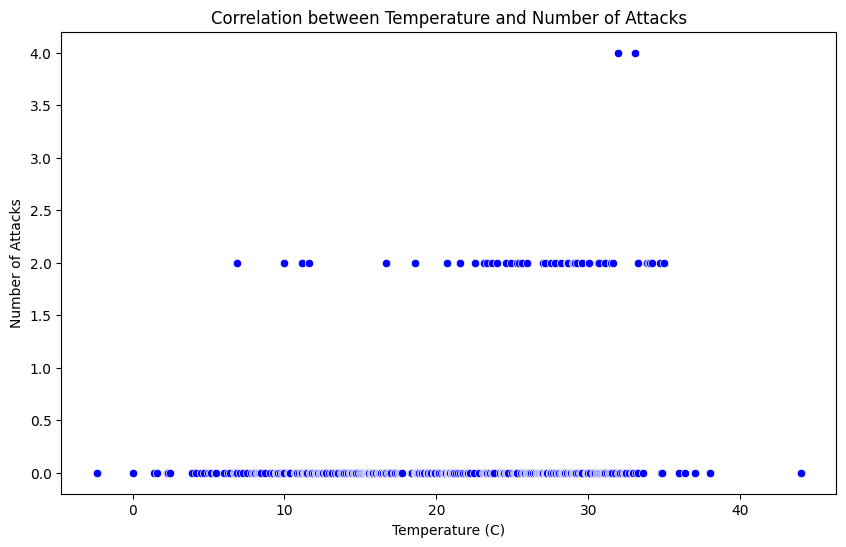

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group data by temperature and count the number of attacks for each unique temperature value
temp_attack_counts = df.groupby('Temperature(C)')['Date'].count().reset_index()
temp_attack_counts.columns = ['Temperature(C)', 'Attack Count']

# Step 2: Plot temperature vs attack count using scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=temp_attack_counts, x='Temperature(C)', y='Attack Count', marker='o', color='b')

plt.title('Correlation between Temperature and Number of Attacks')
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Attacks')
plt.show()


3. Calculate correlation coefficient between temperature and attacks

In [79]:
# Step 1: Ensure you have numeric values for temperature
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')

# Step 2: Group by temperature and count attacks
temp_attacks = df.groupby('Temperature(C)')['Date'].count().reset_index()
temp_attacks.columns = ['Temperature(C)', 'Attack Count']

# Step 3: Calculate Pearson correlation
correlation = temp_attacks.corr()['Temperature(C)']['Attack Count']
print(f"Correlation between Temperature and Number of Attacks: {correlation}")


Correlation between Temperature and Number of Attacks: 0.2602181853327411


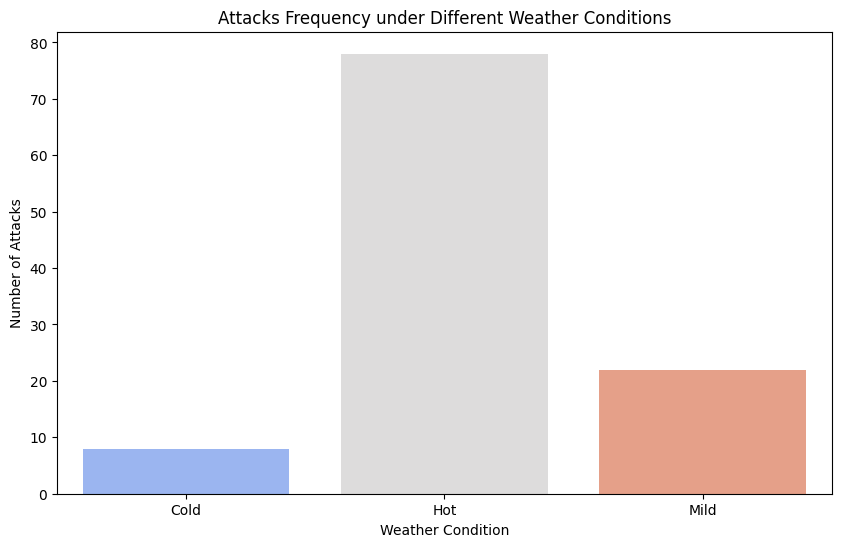

In [79]:
# Define a function to categorize temperature into weather conditions
def categorize_weather(temp):
    if temp < 15:
        return 'Cold'
    elif 15 <= temp < 25:
        return 'Mild'
    else:
        return 'Hot'

# Apply the function to create a new 'Weather Condition' column
df['Weather Condition'] = df['Temperature(C)'].apply(categorize_weather)

# Now, group by the new 'Weather Condition' and count attacks
weather_attack_counts = df.groupby('Weather Condition')['Date'].count().reset_index()
weather_attack_counts.columns = ['Weather Condition', 'Attack Count']

# Plot the number of attacks by weather condition
plt.figure(figsize=(10,6))
sns.barplot(data=weather_attack_counts, x='Weather Condition', y='Attack Count', palette='coolwarm')

plt.title('Attacks Frequency under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Attacks')
plt.show()


# **Identifing clusters or patterns in the locations and times of attacks and use them for predictive measures**

Objective: Detect geographic hotspots where attacks are concentrated.

Method: Use clustering algorithms like K-Means, DBSCAN, or heatmaps to find spatial clusters.

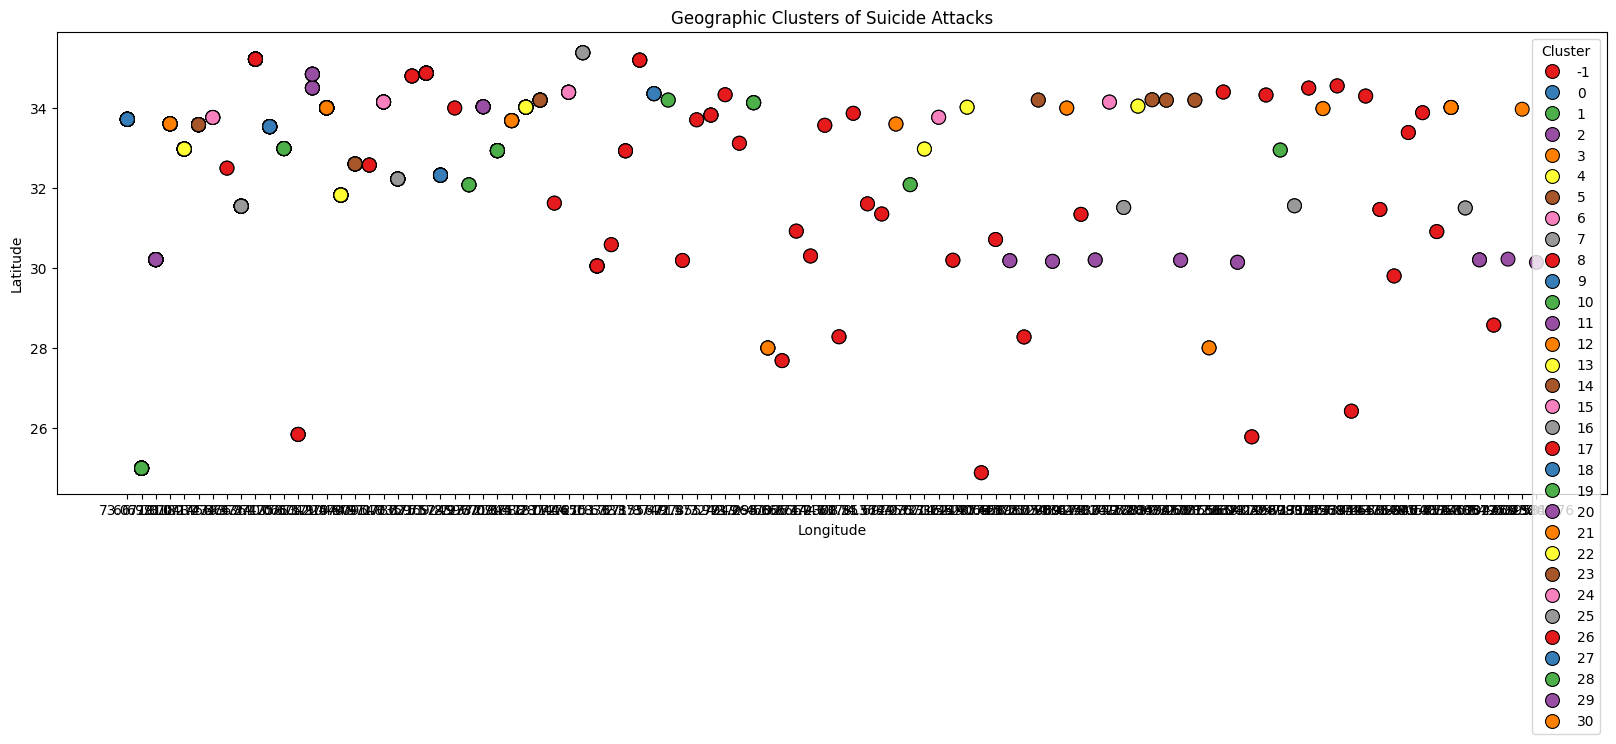

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

 #Extract relevant columns (Latitude and Longitude) for clustering
# This should be done AFTER removing NaN values to ensure consistency
locations = df[['Latitude', 'Longitude']]

# Remove rows with NaN values from the original DataFrame
df = df.dropna(subset=['Latitude', 'Longitude'])

# Use DBSCAN for clustering based on latitude and longitude
db = DBSCAN(eps=0.1, min_samples=5).fit(locations)

# Add cluster labels to the dataframe
df['Cluster'] = db.labels_


# Plotting the clusters
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', palette='Set1', data=df, s=100, edgecolor='k', legend='full')
plt.title('Geographic Clusters of Suicide Attacks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Objective: Identify temporal patterns in the attacks.
Method: Group the attacks by date, month, or year, then use time series analysis to detect patterns.

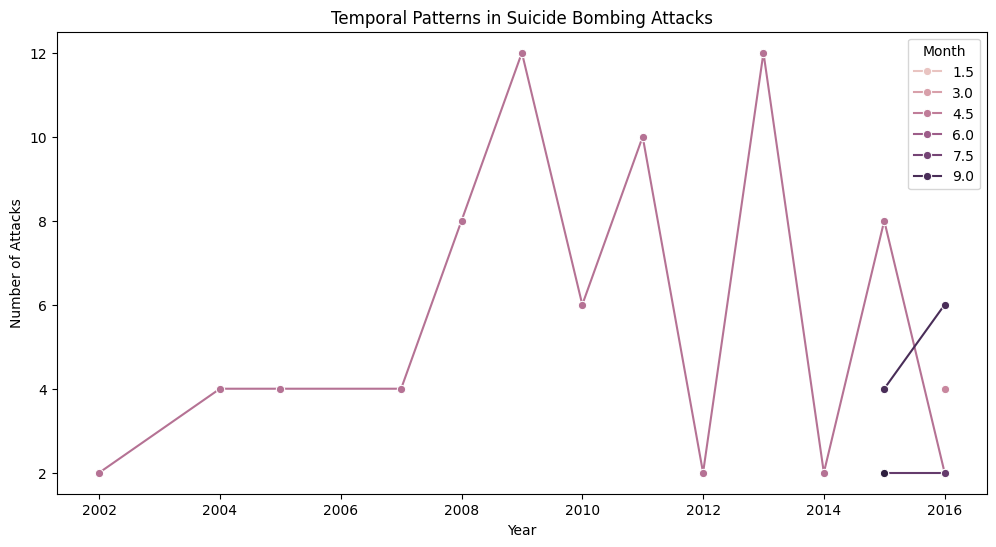

In [86]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month for temporal clustering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month to count attacks
time_series = df.groupby(['Year', 'Month']).size().reset_index(name='Attack Count')

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Attack Count', hue='Month', data=time_series, marker='o')
plt.title('Temporal Patterns in Suicide Bombing Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


Heatmaps for Spatial-Temporal Analysis

In [83]:
# Convert 'Latitude' and 'Longitude' columns to numeric, forcing errors to NaN for cleaning
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with missing or invalid latitude and longitude values
df_clean = df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map centered around the cleaned latitude and longitude
m = folium.Map(location=[df_clean['Latitude'].mean(), df_clean['Longitude'].mean()], zoom_start=6)

# Create a heatmap layer for attacks
HeatMap(data=df_clean[['Latitude', 'Longitude']].values, radius=10).add_to(m)

# Display the map
m


Predicting Future Attack Locations

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values using the mean of the column
imputer = SimpleImputer(strategy='mean')

# Apply imputer to X_train
X_train_imputed = imputer.fit_transform(X_train)

# Apply the same transformation to X_test
X_test_imputed = imputer.transform(X_test)

# Prepare the data
X = df[['Latitude', 'Longitude']]  # Features (Location data)
y = df['Cluster']  # Target (Cluster labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model with the imputed data
knn.fit(X_train_imputed, y_train)

# Predict the clusters for the test set using imputed data
y_pred = knn.predict(X_test_imputed)

# Evaluate the model (accuracy, etc.)
accuracy = knn.score(X_test_imputed, y_test)
print(f'Prediction Accuracy: {accuracy:.2f}')

Prediction Accuracy: 0.97


To get a better understanding of how well the model is performing across different classes, we can visualize a confusion matrix:

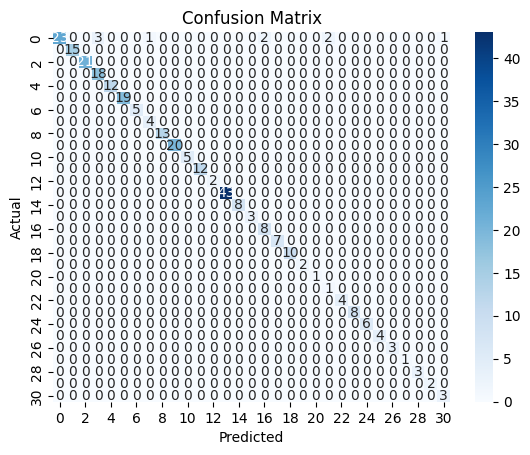

              precision    recall  f1-score   support

          -1       1.00      0.72      0.84        32
           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        21
           2       0.86      1.00      0.92        18
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00         5
           6       0.80      1.00      0.89         4
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         3
          15       0.80      1.00      0.89         8
          16       1.00    

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


In [88]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train_imputed, y_train, cv=5)
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())


Cross-Validation Scores:  [0.94927536 0.95652174 0.95652174 0.96350365 0.97080292]
Mean Cross-Validation Score:  0.9593250819845551


Consistency: The cross-validation scores show little variation between folds, which suggests that your model is stable and not highly sensitive to how the data is split.

High Performance: The mean score of 95.9% is very high, confirming that the KNN model is performing well overall and is not overfitting or underfitting on any particular subset of the data.

In [89]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearch
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 3}
Best Cross-Validation Score:  0.9593250819845551


The KNN classifier with 3 neighbors is the most accurate model based on your cross-validation results.

The cross-validation score of 95.9% indicates strong generalization performance, meaning the model is likely to perform well on new, unseen data.